In [1]:
# Default libs
import os
import warnings
from pathlib import Path
import numpy as np

# Set the working dir
PROJECT_DIR = Path().resolve()
PROJECT_ROOT_NAME = "vision-skanformer"

while PROJECT_DIR.name != PROJECT_ROOT_NAME and PROJECT_DIR.parent != PROJECT_DIR:
    PROJECT_DIR = PROJECT_DIR.parent

if Path().resolve() != PROJECT_DIR:
    os.chdir(PROJECT_DIR)

# Specilized modules
from src.utils.data.transform import Resize
from src.utils.data.dataset import Galaxy10_SDSS_Dataset
from src.utils.data.dataloader import get_loaders
from src.models.viskan import VisionSKANformer
from src.engine.trainer import TrainerVISKAN
from src.callbacks.early_stopping import EarlyStopping
from logs.config.logging_config import setup_logger

# PyTorch libraries
import torch
from torch import nn, optim
from torch.optim import lr_scheduler

# Settings
warnings.filterwarnings("ignore")
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
batch_size = 16
split_ratios = [0.8, 0.1, 0.1]
lr = 0.0001
image_size = 64
patch_size = 8
num_epochs = 50
patience = 5

transform = Resize(image_size)
dataset = Galaxy10_SDSS_Dataset('data/Galaxy10.h5', transform)
train_loader, val_loader, test_loader = get_loaders(dataset, batch_size, split_ratios)

model = VisionSKANformer(image_size=image_size, patch_size=patch_size).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.97)
logger = setup_logger(logger_name='TrainerVISKAN', log_file='logs/logging/training_01.log')
callback = EarlyStopping(patience=patience, verbose=True)

trainer = TrainerVISKAN(train_loader, 
                        val_loader, 
                        test_loader, 
                        model, 
                        criterion, 
                        optimizer, 
                        scheduler, 
                        lr, 
                        logger,
                        image_size,
                        batch_size,
                        num_epochs,
                        callback,
                        patience
                        )

trainer.train()

TrainerVISKAN - INFO - Training initialized with batch_size=16, lr=0.0001, num_epochs=50, optimizer=Adam, model=VisionSKANformer


Training Progress:   0%|          | 0/54500 [00:00<?, ?it/s]

TrainerVISKAN - INFO - Epoch 1/50: Train Loss=2.0090, Train Acc=0.2184, Val Loss=1.8402, Val Acc=0.3182, LR=0.000100


Epoch 1/50: Train Loss=2.0090, Val Loss=1.8402
Saved checkpoint at epoch 0 with val_loss 1.8402449895308803


TrainerVISKAN - INFO - Epoch 2/50: Train Loss=1.5834, Train Acc=0.3877, Val Loss=1.6035, Val Acc=0.4275, LR=0.000097


Epoch 2/50: Train Loss=1.5834, Val Loss=1.6035
Saved checkpoint at epoch 1 with val_loss 1.6034599213122884


TrainerVISKAN - INFO - Epoch 3/50: Train Loss=1.3750, Train Acc=0.4746, Val Loss=1.2884, Val Acc=0.5115, LR=0.000094


Epoch 3/50: Train Loss=1.3750, Val Loss=1.2884
Saved checkpoint at epoch 2 with val_loss 1.2883760044616335


TrainerVISKAN - INFO - Epoch 4/50: Train Loss=1.2745, Train Acc=0.5153, Val Loss=1.4021, Val Acc=0.4738, LR=0.000091


Epoch 4/50: Train Loss=1.2745, Val Loss=1.4021
EarlyStopping counter: 1 out of 5


TrainerVISKAN - INFO - Epoch 5/50: Train Loss=1.2011, Train Acc=0.5398, Val Loss=1.2687, Val Acc=0.5372, LR=0.000089


Epoch 5/50: Train Loss=1.2011, Val Loss=1.2687
Saved checkpoint at epoch 4 with val_loss 1.2686517685241279


TrainerVISKAN - INFO - Epoch 6/50: Train Loss=1.1378, Train Acc=0.5704, Val Loss=1.2434, Val Acc=0.5312, LR=0.000086


Epoch 6/50: Train Loss=1.1378, Val Loss=1.2434
Saved checkpoint at epoch 5 with val_loss 1.2433512333448706


TrainerVISKAN - INFO - Epoch 7/50: Train Loss=1.0995, Train Acc=0.5811, Val Loss=1.2227, Val Acc=0.5386, LR=0.000083


Epoch 7/50: Train Loss=1.0995, Val Loss=1.2227
Saved checkpoint at epoch 6 with val_loss 1.2226524015869757


TrainerVISKAN - INFO - Epoch 8/50: Train Loss=1.0694, Train Acc=0.5903, Val Loss=1.1662, Val Acc=0.5551, LR=0.000081


Epoch 8/50: Train Loss=1.0694, Val Loss=1.1662
Saved checkpoint at epoch 7 with val_loss 1.166162375138373


TrainerVISKAN - INFO - Epoch 9/50: Train Loss=1.0433, Train Acc=0.6035, Val Loss=1.1689, Val Acc=0.5611, LR=0.000078


Epoch 9/50: Train Loss=1.0433, Val Loss=1.1689
EarlyStopping counter: 1 out of 5


TrainerVISKAN - INFO - Epoch 10/50: Train Loss=1.0180, Train Acc=0.6141, Val Loss=1.1645, Val Acc=0.5776, LR=0.000076


Epoch 10/50: Train Loss=1.0180, Val Loss=1.1645
Saved checkpoint at epoch 9 with val_loss 1.1645125135355197


TrainerVISKAN - INFO - Epoch 11/50: Train Loss=0.9898, Train Acc=0.6311, Val Loss=1.0574, Val Acc=0.6125, LR=0.000074


Epoch 11/50: Train Loss=0.9898, Val Loss=1.0574
Saved checkpoint at epoch 10 with val_loss 1.0574362877862402


TrainerVISKAN - INFO - Epoch 12/50: Train Loss=0.9766, Train Acc=0.6352, Val Loss=1.0655, Val Acc=0.6061, LR=0.000072


Epoch 12/50: Train Loss=0.9766, Val Loss=1.0655
EarlyStopping counter: 1 out of 5


TrainerVISKAN - INFO - Epoch 13/50: Train Loss=0.9568, Train Acc=0.6419, Val Loss=1.0764, Val Acc=0.6042, LR=0.000069


Epoch 13/50: Train Loss=0.9568, Val Loss=1.0764
EarlyStopping counter: 2 out of 5


TrainerVISKAN - INFO - Epoch 14/50: Train Loss=0.9357, Train Acc=0.6459, Val Loss=1.0187, Val Acc=0.6299, LR=0.000067


Epoch 14/50: Train Loss=0.9357, Val Loss=1.0187
Saved checkpoint at epoch 13 with val_loss 1.0187231147913236


TrainerVISKAN - INFO - Epoch 15/50: Train Loss=0.9157, Train Acc=0.6539, Val Loss=1.0981, Val Acc=0.6010, LR=0.000065


Epoch 15/50: Train Loss=0.9157, Val Loss=1.0981
EarlyStopping counter: 1 out of 5


TrainerVISKAN - INFO - Epoch 16/50: Train Loss=0.9067, Train Acc=0.6615, Val Loss=0.9020, Val Acc=0.6612, LR=0.000063


Epoch 16/50: Train Loss=0.9067, Val Loss=0.9020
Saved checkpoint at epoch 15 with val_loss 0.9020149228329829


TrainerVISKAN - INFO - Epoch 17/50: Train Loss=0.8890, Train Acc=0.6679, Val Loss=0.8844, Val Acc=0.6667, LR=0.000061


Epoch 17/50: Train Loss=0.8890, Val Loss=0.8844
Saved checkpoint at epoch 16 with val_loss 0.8844192637775445


TrainerVISKAN - INFO - Epoch 18/50: Train Loss=0.8769, Train Acc=0.6712, Val Loss=0.9410, Val Acc=0.6359, LR=0.000060


Epoch 18/50: Train Loss=0.8769, Val Loss=0.9410
EarlyStopping counter: 1 out of 5


TrainerVISKAN - INFO - Epoch 19/50: Train Loss=0.8625, Train Acc=0.6772, Val Loss=0.9214, Val Acc=0.6579, LR=0.000058


Epoch 19/50: Train Loss=0.8625, Val Loss=0.9214
EarlyStopping counter: 2 out of 5


TrainerVISKAN - INFO - Epoch 20/50: Train Loss=0.8568, Train Acc=0.6778, Val Loss=0.9422, Val Acc=0.6446, LR=0.000056


Epoch 20/50: Train Loss=0.8568, Val Loss=0.9422
EarlyStopping counter: 3 out of 5


TrainerVISKAN - INFO - Epoch 21/50: Train Loss=0.8479, Train Acc=0.6838, Val Loss=0.8594, Val Acc=0.6786, LR=0.000054


Epoch 21/50: Train Loss=0.8479, Val Loss=0.8594
Saved checkpoint at epoch 20 with val_loss 0.8594383838748144


TrainerVISKAN - INFO - Epoch 22/50: Train Loss=0.8146, Train Acc=0.6935, Val Loss=0.9001, Val Acc=0.6726, LR=0.000053


Epoch 22/50: Train Loss=0.8146, Val Loss=0.9001
EarlyStopping counter: 1 out of 5


TrainerVISKAN - INFO - Epoch 23/50: Train Loss=0.8005, Train Acc=0.7034, Val Loss=0.9711, Val Acc=0.6368, LR=0.000051


Epoch 23/50: Train Loss=0.8005, Val Loss=0.9711
EarlyStopping counter: 2 out of 5


TrainerVISKAN - INFO - Epoch 24/50: Train Loss=0.8088, Train Acc=0.6968, Val Loss=0.8428, Val Acc=0.6956, LR=0.000050


Epoch 24/50: Train Loss=0.8088, Val Loss=0.8428
Saved checkpoint at epoch 23 with val_loss 0.8427627038474035


TrainerVISKAN - INFO - Epoch 25/50: Train Loss=0.8013, Train Acc=0.6978, Val Loss=1.1188, Val Acc=0.5872, LR=0.000048


Epoch 25/50: Train Loss=0.8013, Val Loss=1.1188
EarlyStopping counter: 1 out of 5


TrainerVISKAN - INFO - Epoch 26/50: Train Loss=0.7948, Train Acc=0.7055, Val Loss=0.9578, Val Acc=0.6382, LR=0.000047


Epoch 26/50: Train Loss=0.7948, Val Loss=0.9578
EarlyStopping counter: 2 out of 5


TrainerVISKAN - INFO - Epoch 27/50: Train Loss=0.7710, Train Acc=0.7109, Val Loss=0.8337, Val Acc=0.6965, LR=0.000045


Epoch 27/50: Train Loss=0.7710, Val Loss=0.8337
Saved checkpoint at epoch 26 with val_loss 0.8337049190882042


TrainerVISKAN - INFO - Epoch 28/50: Train Loss=0.7703, Train Acc=0.7156, Val Loss=0.8354, Val Acc=0.6993, LR=0.000044


Epoch 28/50: Train Loss=0.7703, Val Loss=0.8354
EarlyStopping counter: 1 out of 5


TrainerVISKAN - INFO - Epoch 29/50: Train Loss=0.7605, Train Acc=0.7153, Val Loss=0.8689, Val Acc=0.6850, LR=0.000043


Epoch 29/50: Train Loss=0.7605, Val Loss=0.8689
EarlyStopping counter: 2 out of 5


TrainerVISKAN - INFO - Epoch 30/50: Train Loss=0.7496, Train Acc=0.7225, Val Loss=0.8963, Val Acc=0.6758, LR=0.000041


Epoch 30/50: Train Loss=0.7496, Val Loss=0.8963
EarlyStopping counter: 3 out of 5


TrainerVISKAN - INFO - Epoch 31/50: Train Loss=0.7444, Train Acc=0.7226, Val Loss=0.8551, Val Acc=0.6961, LR=0.000040


Epoch 31/50: Train Loss=0.7444, Val Loss=0.8551
EarlyStopping counter: 4 out of 5


TrainerVISKAN - INFO - Epoch 32/50: Train Loss=0.7562, Train Acc=0.7137, Val Loss=0.8555, Val Acc=0.6873, LR=0.000039
TrainerVISKAN - INFO - Early stopping triggered


Epoch 32/50: Train Loss=0.7562, Val Loss=0.8555
EarlyStopping counter: 5 out of 5


TrainerVISKAN - INFO - Test results - Loss: 0.8922, Accuracy: 0.6856


Test Loss: 0.8922, Test Acc: 0.6856


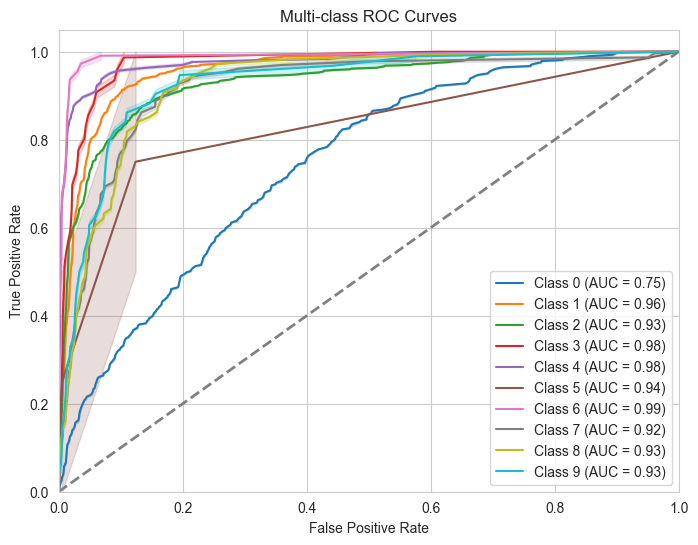

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

n_classes = 10

probs = np.load("logs/logging/test_probs.npy")
labels = np.load("logs/loggingtest_labels.npy")

labels_bin = label_binarize(labels, classes=np.arange(n_classes))
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(labels_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    sns.lineplot(x=fpr[i], y=tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves')
plt.legend(loc='lower right')
plt.show()